# Q1

In [19]:
# dataset
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
  N = len(data)

  # get tv (index=0)
  tv_data = get_column(data, 0)

  # get radio (index=1)
  radio_data = get_column(data, 1)

  # get newspaper (index=2)
  newspaper_data = get_column(data, 2)

  # get sales (index=3)
  sales_data = get_column(data, 3)

  # building X input  and y output for training
  X = [tv_data, radio_data, newspaper_data]
  y = sales_data
  return X,y

In [20]:
#Multiple choices:
#Question 1:
X,y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


# Q2

In [21]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()  # Initialize weights and bias
    
    N = len(y_data)
    
    for epoch in range(epoch_max):
        for i in range(N):
            # Get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss
            loss = compute_loss(y, y_hat)

            # Compute gradient for w1, w2, w3, and b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

        # Logging the loss for each epoch
        losses.append(loss)

    return (w1, w2, w3, b, losses)


In [22]:
def initialize_params():
    # w1 = random.gauss(mu=0.0, sigma=0.01)
    # w2 = random.gauss(mu=0.0, sigma=0.01)
    # w3 = random.gauss(mu=0.0, sigma=0.01)
    # b  = 0

    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

In [23]:
def predict(x1, x2, x3, w1, w2, w3, b):
    result = w1 * x1 + w2 * x2 + w3 * x3 + b  # Linear model prediction
    return result

In [24]:
#Multiple choices:
#Question 2:
y_p = predict(x1 = 1, x2 =1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y_p)

1.0


In [25]:
def compute_loss(y_hat, y):
    result = np.mean((y_hat - y) ** 2)  # MSE formula
    return result

In [26]:
#Multiple choices:
#Question 3:
l = compute_loss(y_hat=1, y=0.5)
print(l)

0.25


In [27]:
# Compute gradient with respect to wi (weights)
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = -2 * np.mean((y - y_hat) * xi)  # Gradient of MSE wrt weight wi
    return dl_dwi

# Compute gradient with respect to b (bias)
def compute_gradient_b(y, y_hat):
    dl_db = -2 * np.mean(y - y_hat)  # Gradient of MSE wrt bias
    return dl_db

In [28]:
#Multiple choices:
#Question 4:
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


In [29]:
#Multiple choices:
#Question 5:
g_b =  compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


In [30]:
# Update weights using the gradient and learning rate
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr * dl_dwi  # Update rule for weights
    return wi

# Update bias using the gradient and learning rate
def update_weight_b(b, dl_db, lr):    
    b = b - lr * dl_db  # Update rule for bias
    return b

In [31]:
#Multiple choices:
#Question 6:
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr = 1e-5)
print(after_wi)

1.000005


In [32]:
#Multiple choices:
#Question 7:
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr = 1e-5)
print(after_b)    


0.50001


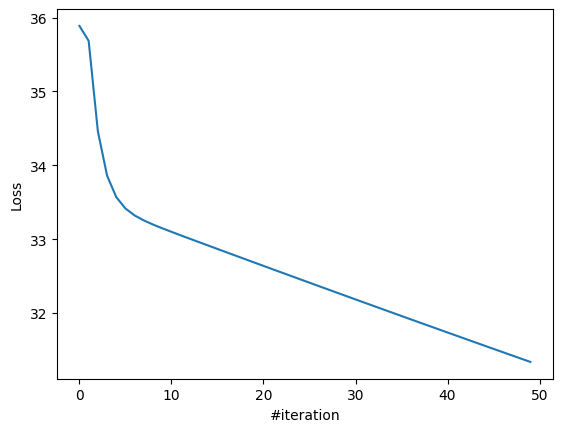

In [33]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [34]:
#Multiple choices:
#Question 8:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
print(w1,w2,w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [35]:
#Multiple choices:
#Question 9:
# given new data
tv = 19.2
radio = 35.9 
newspaper = 51.3

X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


In [36]:
# Compute mean absolute error (MAE) loss
def compute_loss_mae(y_hat, y):
    result = np.mean(np.abs(y_hat - y))  # MAE formula
    return result

In [37]:
l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


In [41]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    # Initialize weights and bias
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        # Loop over all samples in the dataset
        for i in range(N):
            # Get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss (Mean Absolute Error in this case)
            loss = compute_loss_mae(y, y_hat)

            # Accumulate loss to total loss
            loss_total += loss

            # Compute gradient for w1, w2, w3, and b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Accumulate gradients for all weights and bias
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # After processing N samples, update weights and bias
        w1 = update_weight_wi(w1, dw1_total/N, lr)
        w2 = update_weight_wi(w2, dw2_total/N, lr)
        w3 = update_weight_wi(w3, dw3_total/N, lr)
        b = update_weight_b(b, db_total/N, lr)

        # Logging the average loss for this epoch
        losses.append(loss_total / N)

    return (w1, w2, w3, b, losses)


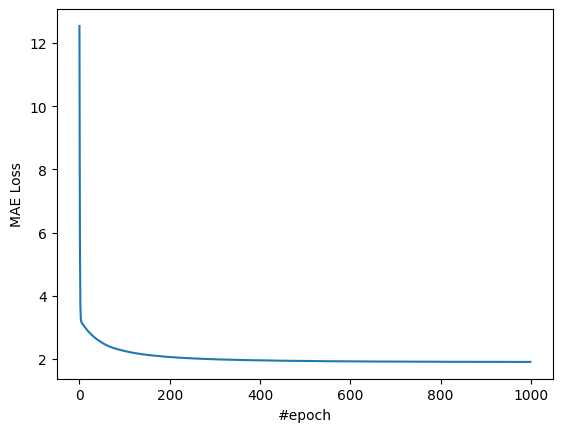

In [43]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X,y,1000)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MAE Loss")
plt.show()

In [45]:
#Multiple choices:
#Question 11:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X,y,1000)
print(w1,w2,w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


# Q4

In [46]:
def initialize_params():
    bias = 0  # Initialize bias to 0
    w1 = random.gauss(mu=0.0, sigma=0.01)  # Initialize weight 1 with a small Gaussian noise
    w2 = random.gauss(mu=0.0, sigma=0.01)  # Initialize weight 2 similarly
    w3 = random.gauss(mu=0.0, sigma=0.01)  # Initialize weight 3 similarly

    # For testing, return these specific values (can be commented out in real application)
    return [0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]

In [50]:
def predict(X_features, weights):
    # Calculate the predicted output
    result = np.dot(X_features, weights)  # Using dot product to calculate y
    return result

def compute_loss(y_hat, y):
    return (y_hat - y) ** 2  # Squared loss

def compute_gradient_w(X_features, y, y_hat):
    # Compute the gradient of the loss with respect to the weights
    dl_dweights = 2 * np.dot(X_features.T, (y_hat - y)) / len(y)  # Mean squared error gradient
    return dl_dweights

def update_weight(weights, dl_dweights, lr):
    # Update the weights based on the gradient and learning rate
    weights -= lr * dl_dweights  # Gradient descent update
    return weights

In [56]:
def implement_linear_regression(X_feature, y_output, epoch_max=50, lr=1e-5):
    losses = []
    weight = initialize_params()  # Initialize weights and bias
    N = len(y_output)   
    for epoch in range(epoch_max):
        print("epoch: ", epoch)
        for i in range(N):
            feature_i = X_feature[i]
            y = y_output[i]
            y_hat = predict(feature_i, weight)
            loss = compute_loss(y, y_hat)
            dl_dweights = compute_gradient_w(feature_i, y, y_hat)
            weight = update_weight(weight, dl_dweights, lr)
            losses.append(loss)
    return (weight, losses)

X,y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X, y)
plt.plot(L)
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

epoch:  0


ValueError: shapes (200,) and (4,) not aligned: 200 (dim 0) != 4 (dim 0)